# Credit Card Eligibility
This use case helps is to check if a customer is eligible for a credit card.

## Dataset Description
The dataset is takem from public domain. It helps in predicting whether a customer would be eligible to get a credit card.
There are 12 attributes in the dataset. They are:
    
1.customer_id

2.demographic_slice

3.country_reg

4.ad_exp

5.est_income

6.hold_bal

7.pref_cust_prob

8.imp_cscore

9.RiskScore

10.imp_crediteval

11.axio_score

12.card_offer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

%matplotlib inline

setting the chart style

In [2]:
sns.set(style='white', context='notebook', palette='deep')
sns.set_style('white')

## A brief about the data

Importing the data into the customers dataframe. We would be using this data to train and test our model.
The steps that to be following for this analysis are :
    1. Explatory analysis.
    2. Visualization of the data
    3. Normalization of the data fields.
    4. Building of the model

In [3]:
customers = pd.read_csv('../input/Test 1.csv')

Looking at the imported data. 

In [4]:
customers.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False
1,515901,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False
2,95166,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False
3,425557,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False
4,624581,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False


Include = "all", so that we can see the metrics on string fields as well. From the data below, we can see that demographic_slice has 4 unique values, country_reg has 2 and ad_exp has 2. We could use this information to our benefit by converting these string fields into numerical fields for us to process. 

In [5]:
customers.describe(include="all")

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
count,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,4,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,BWEsk45,E,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,2569,5007,5006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8469
mean,496819.831400,NaN,NaN,NaN,65853.355259,20.962621,0.329419,662.548800,670.042869,25.692162,0.393211,NaN
std,287391.314157,NaN,NaN,NaN,31093.369592,18.841121,0.223299,90.549985,89.965854,1.889274,0.288243,NaN
min,244.000000,NaN,NaN,NaN,2.054543,-2.140206,0.001781,500.000000,324.436647,21.363123,-0.000052,NaN
25%,245172.500000,NaN,NaN,NaN,39165.786086,6.150577,0.156965,600.000000,609.231181,24.295435,0.139424,NaN
50%,495734.000000,NaN,NaN,NaN,76903.628763,11.913366,0.272263,655.000000,669.493442,25.611903,0.337841,NaN
75%,745475.250000,NaN,NaN,NaN,91032.514900,32.238914,0.459890,727.000000,730.484985,27.062519,0.624886,NaN


By looking at the information of the columns and their datatype, we see that the demographic_slice,country_reg and ad_exp are of object datatype. We have to convert them to string.

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
customer_id          10000 non-null int64
demographic_slice    10000 non-null object
country_reg          10000 non-null object
ad_exp               10000 non-null object
est_income           10000 non-null float64
hold_bal             10000 non-null float64
pref_cust_prob       10000 non-null float64
imp_cscore           10000 non-null int64
RiskScore            10000 non-null float64
imp_crediteval       10000 non-null float64
axio_score           10000 non-null float64
card_offer           10000 non-null bool
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 869.2+ KB


In [7]:
customers.columns

Index(['customer_id', 'demographic_slice', 'country_reg', 'ad_exp',
       'est_income', 'hold_bal', 'pref_cust_prob', 'imp_cscore', 'RiskScore',
       'imp_crediteval', 'axio_score', 'card_offer'],
      dtype='object')

# Visualization

We plot the data as per our understanding of the business as well as relations between columns

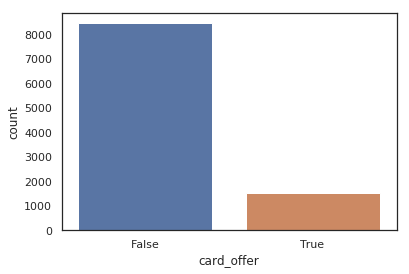

In [8]:
sns.countplot(x='card_offer',data=customers)

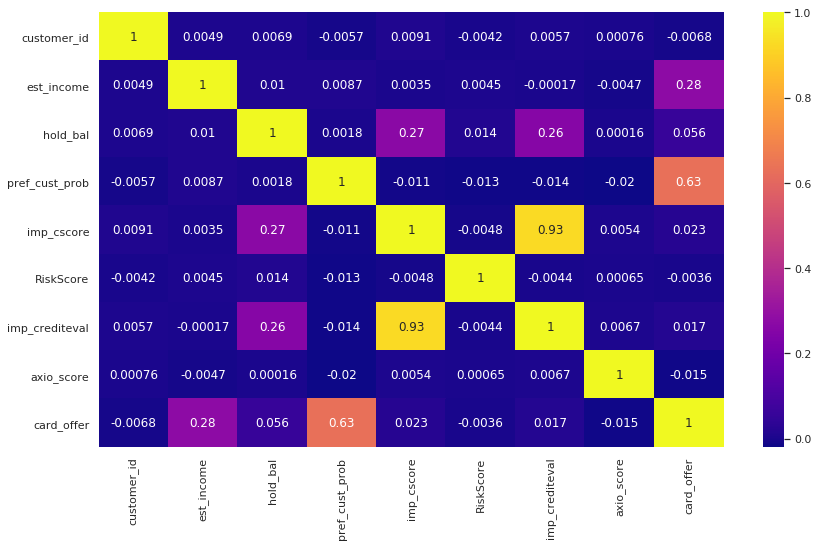

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(data=customers.corr(),cmap='plasma',annot=True)

<Figure size 1008x576 with 0 Axes>

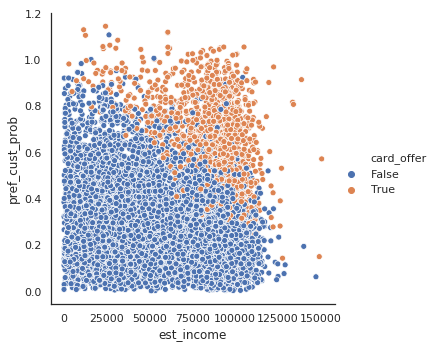

In [10]:
plt.figure(figsize=(14,8))
sns.relplot(x='est_income',y='pref_cust_prob',data=customers,hue='card_offer')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c901a3400>,
      dtype=object)

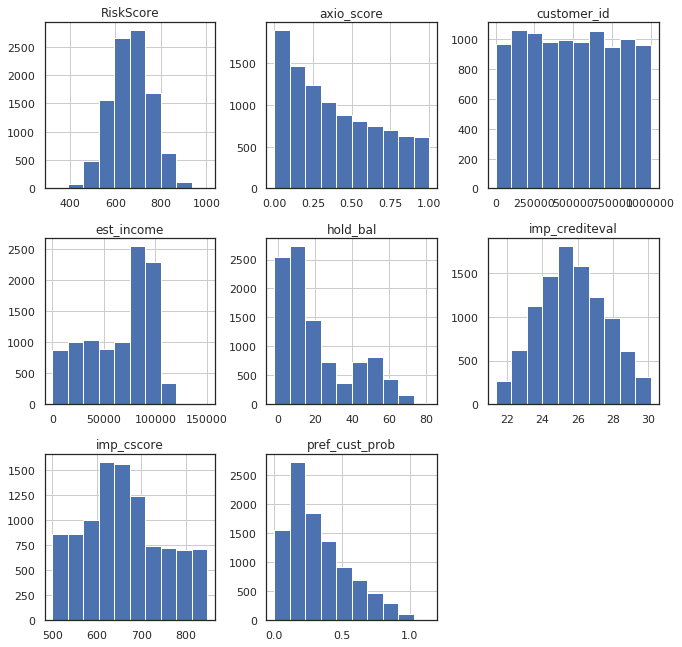

In [11]:
 customers[customers.dtypes[(customers.dtypes=="float64")|(customers.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

After looking at the graphs above, we can see that, the values for RiskScore and imp_score range between 0 to 800, and 
for est_income, the value go till 15000. Compared to the other features, these three have different scales. The est_income values may dominate the outcome of the result.


# Data preprocessing.

Create a function to convert the categorical columns into encoded vectors. 

In [12]:
def clean_data(df):
    
    # encoding the categorical columns    
    demographic_slice_df = pd.get_dummies(data=df['demographic_slice'],drop_first=True,prefix='ds')
    country_reg_df = pd.get_dummies(data=df['country_reg'],prefix='cr',drop_first=True)
    ad_exp_df = pd.get_dummies(data=df['ad_exp'],prefix='ae',drop_first=True)
    
    
    # scaling the features
    minMax = MinMaxScaler()
    customers_ent_income = pd.DataFrame(minMax.fit_transform(df[['est_income','RiskScore','imp_cscore']])
                                    ,columns=['scaled_est_income','scales_riskScore','scaled_imp_csore'])
    
    # creating the transformed dataframe
    df = pd.concat([df,demographic_slice_df,country_reg_df,ad_exp_df,customers_ent_income],axis=1)
    df.drop(['demographic_slice','country_reg','ad_exp','est_income','RiskScore','imp_cscore'],axis=1,inplace=True)
    
    return(df)
    

In [13]:
customers = clean_data(customers)
customers['card_offer'] = customers['card_offer'].apply(np.int32)
customers.head()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,customer_id,hold_bal,pref_cust_prob,imp_crediteval,axio_score,card_offer,ds_BWEsk45,ds_CARDIF2,ds_DERS3w5,cr_W,ae_Y,scaled_est_income,scales_riskScore,scaled_imp_csore
0,713782,3.000000,0.531112,23.977827,0.137289,0,0,0,0,1,0,0.221912,0.262936,0.340974
1,515901,20.257927,0.297439,22.986398,0.052264,0,0,0,0,0,0,0.132363,0.728863,0.077364
2,95166,4.000000,0.018463,24.939219,0.452035,0,0,0,0,1,1,0.340252,0.385508,0.303725
3,425557,18.653631,0.089344,24.841147,0.564619,0,0,0,0,0,1,0.446466,0.456231,0.243553
4,624581,4.000000,0.094948,24.679363,0.917304,0,0,0,0,1,0,0.133464,0.452185,0.191977


# Model Creation

Based on the data, we run it for Logistic regression model for the test and train data that we have

In [14]:
X = customers.drop(['customer_id','card_offer'],axis=1)
y = customers['card_offer']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
print('Shapes of the dataframes')

print('X_train',X_train.shape)
print('X_test',X_test.shape)

print('y_train',y_train.shape)
print('y_test',y_test.shape)

Shapes of the dataframes
X_train (7000, 12)
X_test (3000, 12)
y_train (7000,)
y_test (3000,)


In [17]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
predictions = lr.predict(X_test)

In [19]:
print(accuracy_score(y_test,predictions))

0.9586666666666667


In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2555
           1       0.90      0.81      0.85       445

   micro avg       0.96      0.96      0.96      3000
   macro avg       0.93      0.90      0.91      3000
weighted avg       0.96      0.96      0.96      3000



In [21]:
print(confusion_matrix(y_test,predictions))

[[2516   39]
 [  85  360]]
